In [46]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

## Ejercicio 5: Generar Datos Sintéticos para una Regresión Lineal Simple


Generar datos sintéticos
de una regresión lineal simple con ruido gaussiano, como los que generábamos
cuando veíamos regresión lineal frecuentista. Por ejemplo, considerar la
función $f:\mathbb{R}\rightarrow \mathbb{R}$ dada por $f(x) = 2x - 1$, $X \sim \mathcal{U}(0,1)$ y $Y := f(X)$ y $n = 100$; tomar  muestras $x_1,\ldots,x_{n}$ de $X$ y aplicar lafunción  $f$ a cada muestra para calcular $y_i = f(x_i)$, con $1\leq i \leq n$.

*  a) Ajustar un modelo lineal de la forma $y\sim N(\beta_0+\beta_1 x,\epsilon)$ usando PyMC. Graficar y describir las posterior de los parámetros de la regresión.

* b) ¿Cuál es el valor que estimamos que tenga $f(\frac{1}{2})$? ¿Con qué error?

* c)Graficar y dar percentiles de la distribución de $\beta_0 + \frac{1}{2} \beta_1$.

In [47]:
n = 100
X = np.random.uniform(0, 1, n)
Y = 2 * X - 1
Y = Y + np.random.normal(0, 0.1, 100)

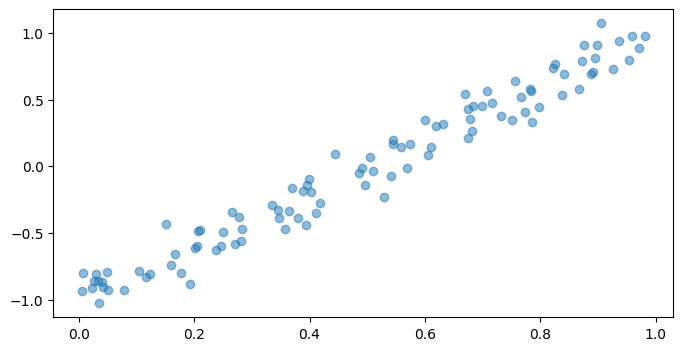

In [48]:
plt.figure(figsize=(8, 4))
plt.scatter(X, Y, alpha=0.5, label='datos generados')


### a) **Ajustar un modelo lineal de la forma**

**Planteamos un modelo lineal de la forma $y\sim N(\beta_0+\beta_1 x,\epsilon)$**


In [49]:
with pm.Model() as modelo:
    beta0 = pm.Normal('beta0', mu=0, sigma=10) #no informativo
    beta1 = pm.Normal('beta1', mu=0, sigma=10) #no informativo
    sigma = pm.HalfNormal('sigma', sigma=1)

    mu = beta0 + beta1 * X
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma]


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package
s\Python311\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 81 seconds.


### Graficar y describir las posterior de los parámetros de la regresión.

In [50]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,-1.001,0.022,-1.044,-0.961,0.000,0.0,3765.0,3748.0,1.0
beta1,1.984,0.039,1.911,2.056,0.001,0.0,3871.0,3957.0,1.0
sigma,0.116,0.008,0.101,0.131,0.000,0.0,4637.0,4104.0,1.0


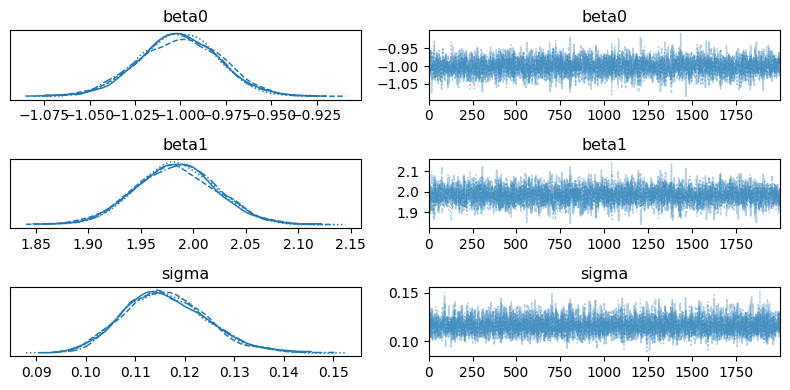

In [51]:
az.plot_trace(trace,figsize= (8,4))
plt.tight_layout()

In [52]:
summary = az.summary(trace)
print("\nEstadísticas resumen:")
summary


Estadísticas resumen:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,-1.001,0.022,-1.044,-0.961,0.000,0.0,3765.0,3748.0,1.0
beta1,1.984,0.039,1.911,2.056,0.001,0.0,3871.0,3957.0,1.0
sigma,0.116,0.008,0.101,0.131,0.000,0.0,4637.0,4104.0,1.0


### b) Calcular $f(\frac{1}{2})$
Para calcular $f(\frac{1}{2})$, estamos usando la estimación del modelo de regresión lineal ajustado.

In [53]:
x = 0.5

posterior_samples = trace.posterior
beta0_samples = posterior_samples['beta0'].values.flatten()
beta1_samples = posterior_samples['beta1'].values.flatten()

In [54]:
posterior_samples['beta0'].values

array([[-1.00596698, -0.98556314, -0.98984937, ..., -0.99057177,
        -1.00352009, -1.00075213],
       [-0.98877763, -0.96746106, -0.9321052 , ..., -1.02149505,
        -1.00001815, -0.98792035],
       [-1.02504833, -1.02211223, -1.02019426, ..., -0.98023274,
        -0.99842227, -1.03204576],
       [-0.98469785, -0.99781856, -0.9799436 , ..., -0.97643363,
        -0.97847201, -0.97542275]])

In [55]:
# Calcular f(1/2)
x = 0.5
#tiene las muestras a de las distribuciones posterioes
posterior_samples = trace.posterior
f_medio = posterior_samples['beta0'].values + x * posterior_samples['beta1'].values

# posterior_samples['beta0'].values son todas las distribuciones posibles de beta0
# f_medio es una volsa de valores medios, donde los que tienen mas probabilidad van a estar mas veces 

#media y el error
valor_medio = float(np.mean(f_medio))
error = float(np.std(f_medio))

print(f"\nPredicción para f(1/2): {valor_medio:.3f} ± {error:.3f}")


Predicción para f(1/2): -0.009 ± 0.012


(array([  24.,  124.,  509., 1480., 2170., 2090., 1178.,  342.,   66.,
          17.]),
 array([-0.05083744, -0.04221721, -0.03359697, -0.02497674, -0.0163565 ,
        -0.00773627,  0.00088397,  0.0095042 ,  0.01812444,  0.02674467,
         0.03536491]),
 <BarContainer object of 10 artists>)

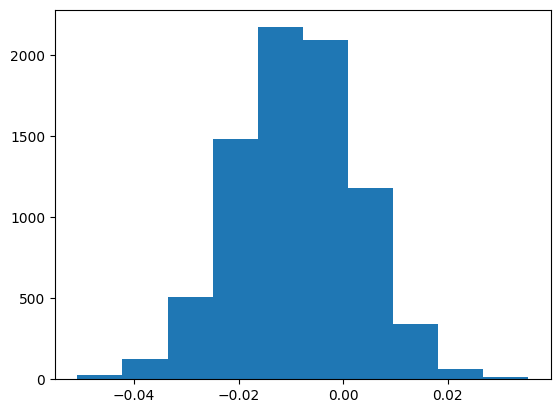

In [66]:
plt.hist(f_medio)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.05083744, -0.04796403, -0.04509062, -0.04221721, -0.0393438 ,
        -0.03647038, -0.03359697, -0.03072356, -0.02785015, -0.02497674,
        -0.02210333, -0.01922991, -0.0163565 , -0.01348309, -0.01060968,
        -0.00773627, -0.00486286, -0.00198944,  0.00088397,  0.00375738,
         0.00663079,  0.0095042 ,  0.01237761,  0.01525103,  0.01812444,
         0.02099785,  0.02387126,  0.02674467,  0.02961808,  0.0324915 ,
         0.03536491]),
 <a list of 2000 BarContainer objects>)

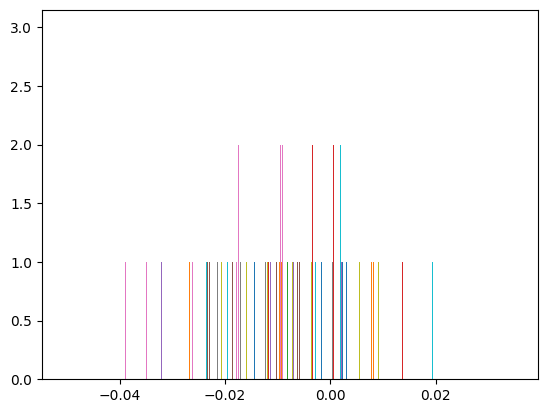

In [56]:
plt.hist(f_medio, bins= 30)

In [57]:
f_medio

array([[-0.02174285,  0.01040591, -0.01123239, ..., -0.01212033,
        -0.00719848, -0.01545805],
       [-0.00172362, -0.01590608,  0.01713631, ..., -0.02187307,
         0.00660228,  0.0081917 ],
       [-0.01883103, -0.01432217, -0.01976253, ..., -0.01586229,
         0.00047079, -0.01187364],
       [-0.00627962, -0.0044612 , -0.00106143, ..., -0.00711871,
        -0.00052342, -0.00852187]])

### c)Graficar y dar percentiles de la distribución de $\beta_0 + \frac{1}{2} \beta_1$.

 Analizamos percentiles para ver la distribución de nuestros valores estimados y la incertidumbre.

In [58]:
np.percentile(f_medio, [2.5, 25, 50, 75, 97.5])

array([-0.03189381, -0.01697668, -0.00881767, -0.00111503,  0.01395238])

In [67]:
# Calcular percentiles
percentiles = np.percentile(f_medio, [2.5, 25, 50, 75, 97.5])
print("\nPercentiles de β₀ + 0.5β₁:")
print(f"2.5%: {percentiles[0]:.3f}")
print(f"25%:  {percentiles[1]:.3f}")
print(f"50%:  {percentiles[2]:.3f}")
print(f"75%:  {percentiles[3]:.3f}")
print(f"97.5%:{percentiles[4]:.3f}")


Percentiles de β₀ + 0.5β₁:
2.5%: -0.032
25%:  -0.017
50%:  -0.009
75%:  -0.001
97.5%:0.014


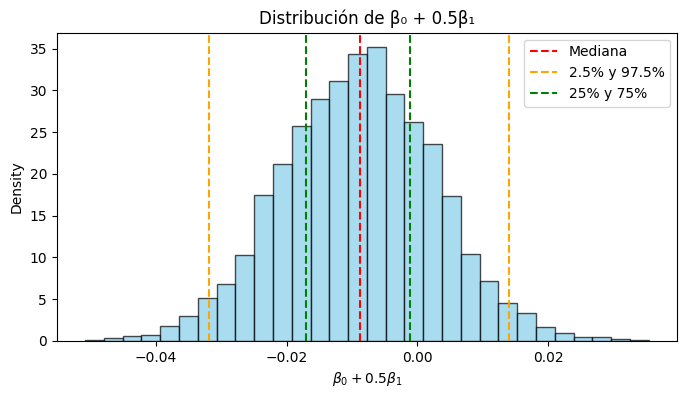

In [68]:
# Asegurarse de que f_medio es un array unidimensional
f_medio = np.array(f_medio).flatten()

# Graficar la distribución de β₀ + 0.5β₁
plt.figure(figsize=(8, 4))
plt.hist(f_medio, bins=30, density=True, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(percentiles[2], color="red", linestyle="--", label="Mediana")
plt.axvline(percentiles[0], color="orange", linestyle="--", label="2.5% y 97.5%")
plt.axvline(percentiles[4], color="orange", linestyle="--")
plt.axvline(percentiles[1], color="green", linestyle="--", label="25% y 75%")
plt.axvline(percentiles[3], color="green", linestyle="--")
plt.xlabel(r"$\beta_0 + 0.5 \beta_1$")
plt.ylabel("Density")
plt.title("Distribución de β₀ + 0.5β₁")
plt.legend()
plt.show()